<a href="https://colab.research.google.com/github/PosgradoMNA/Equipo-7-Posada-Roca-Guia-/blob/main/Reto_V1_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

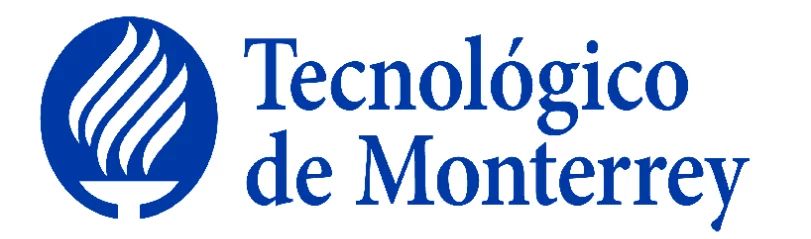
#**Reto**

##Rigoberto Vega Escudero, A01793132

##Carlos Enriquez Gorgonio - A01793102

##Materia: Ciencia De Datos

##Profesor:Maria De La Paz Rico Fernandez

##11/Noviembre/2022

# Limpieza e interpretacion de los datos

##**Limpieza, análisis, visualización y agrupamiento.**

Limpieza de base de datos.
Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
- Identificando tendencias centrales promedio, media y mediana de los datos. 
- Identificar medidas de dispersión, máximo, mínimo .
- Identificar medidas de posición no centrales , los cuartiles , outliers.   
- Identificar correlaciones.
- Preparar los datos 
- Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
- Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Como base del ejercicio, se procede a cargar las librerias que se utilizaran
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#**Limpieza, graficos y seleccion de datos**

#**Limpieza Aguas Superficiales**

In [ ]:
#Leemos el Dataset de Aguas Superficiales para empezar limpieza

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',  encoding='latin-1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Del primer analisisd de datos, se observ[p que el Dataset  tiene una gran cantidad de columnas con valores NAN, para esta situación decidimos conservar los datos, por lo que posteriormente analizaremos la mejor forma de realizar esta actividad.

In [ ]:
#En nuestra primer etapa de validación de información, decidimos primero ubicar las columnas con elementos vacios
df.isna().any()

CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

## Despues de observar la información de las columnas, se observa que se tienen 4,141 filas, lo que excede los 3,493 que se observan en la columna de semaforos, la cual consiste en nuestra variable predicitiva como posteriormente se explicará, por lo que se eliminaran los datos, hasta que todas las filas tengan como maxico 3,943.

In [ ]:
df = df.dropna(how='all')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

## Despues de volver a ferificar la información, comprobamos que se tengan 54 columnas como en el DataFrame original, para poder empezar a hacer las divisiones necesartias para aplicar transofrmaciones y metodos para llenar los datos faltantes.

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

## Después de relizar todos los elementos y en considerancion del objetivo del reto que se enfoca en la cálidad del agua, se determinó que la columa o caractaterisica semáforo, que indica con colores si el agua es optima o no , se decidio  utilizarlas como punto de partida para el siguiente analisis.



###1. Evaluaremos 3 data sets, uno para cada semaforo y trabajar con sus NaN y faltantes de manera separada.

Primero crearemos una lista de las variables numericas quimicas, aqui procederemos a eliminar datos cadena como '< 2' para poder convertirlos a datos numeros cercanos al valor que indican y ademas procederemos a llenar los valores NaN con la media total del dataset a trabajar, osea que no llenaremos todo el dataset con una media genera, sino que buscaremos aislar cada tipo y aplicarle una media de acuerdo a su color.

In [ ]:
df_verde = df[df.SEMAFORO == 'Verde'].copy()
df_rojo = df[df.SEMAFORO == 'Rojo'].copy()
df_amarillo = df[df.SEMAFORO == 'Amarillo'].copy()
dfs = [df_verde, df_rojo, df_amarillo]

In [ ]:
NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']

In [ ]:
#Limpieza Verdes
lista_verde = list()
lista_rojo = list()
lista_amarillo = list()

for name in NumericasQuimicas:
  df_verde[name] = df_verde[name].astype('str')
  df_verde[name] = df_verde[name].str.replace('<1','1') 
  df_verde[name] = df_verde[name].str.replace('<2','2') 
  df_verde[name] = df_verde[name].str.replace('<3','3') 
  df_verde[name] = df_verde[name].str.replace('<10','10') 
  df_verde[name]= df_verde[name].astype('float')
  mean = df_verde[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_verde[name]= df_verde[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_verde.append([name, mean])
  

#Limpieza Rojos
for name in NumericasQuimicas:
  df_rojo[name] = df_rojo[name].astype('str')
  df_rojo[name] = df_rojo[name].str.replace('<1','1') 
  df_rojo[name] = df_rojo[name].str.replace('<2','2') 
  df_rojo[name] = df_rojo[name].str.replace('<3','3') 
  df_rojo[name] = df_rojo[name].str.replace('<10','10') 
  df_rojo[name]= df_rojo[name].astype('float')
  mean = df_rojo[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_rojo[name]= df_rojo[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_rojo.append([name, mean])

#Limpieza Amarillos
for name in NumericasQuimicas:
  df_amarillo[name] = df_amarillo[name].astype('str')
  df_amarillo[name] = df_amarillo[name].str.replace('<1','1') 
  df_amarillo[name] = df_amarillo[name].str.replace('<2','2') 
  df_amarillo[name] = df_amarillo[name].str.replace('<3','3') 
  df_amarillo[name] = df_amarillo[name].str.replace('<10','10') 
  df_amarillo[name]= df_amarillo[name].astype('float')
  mean = df_amarillo[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_amarillo[name]= df_amarillo[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_amarillo.append([name, mean])


Del analisis anterior, se puede observar que el DataFrame original, se dividió en 3 tipos, correspondientes a los 3 tipos de datos de la columna y, que son los colores del semaforo, de esta forma las imputaciones pueden agruparse de una forma mas estructurada. 

### 2. Ahora utilizamos el archivo de detalle de escalas, para poder encontrar las escalas que nos permitiran saber cuando el agua es "Excelente", "Buena Cálidad", "Aceptable" y "Contaminada"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Escalas_superficial.csv',  encoding='latin-1')
df

,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
0,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
1,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
2,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
3,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
4,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION
5,Excelente,SST menor o igual a 25,"Clase de excepci¢n, muy buena calidad."
6,Buena calidad,SST mayor de 25 y menor o igual a 75,Aguas superficiales con bajo contenido de soli...
7,Aceptable,SST mayor de 75 y menor o igual a 150,Aguas superficiales con indicio de contaminaci...
8,Contaminada,SST mayor de 150 y menor o igual a 400,Aguas superficiales de mala calidad con descar...
9,Fuertemente contaminada,SST mayor de 400,Aguas superficiales con fuerte impacto de desc...


Despues de obtener la media de cada columna, se analiza manualmente con la escala mostrada, y se le asigna su valor correspondiente en una nueva columna.Alicamos este procedimiento para cada DataFrame de cada color del semaforo

In [ ]:
#DataFrame para valores de verde
escala_verde = ['Buena Calidad','Buena Calidad','Excelente','Aceptable','Excelente','Excelente','Excelente','Excelente','Excelente',
             'Excelente','Toxicidad Baja','Toxicidad Baja','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
Verde_df_means = pd.DataFrame(lista_verde, columns = ['Nombre','Valor de la media'])
Verde_df_means['Escala Nueva'] = escala_verde
Verde_df_means

,Nombre,Valor de la media,Escala Nueva
0,DBO_mg/L,3.372192,Buena Calidad
1,DQO_mg/L,18.241230,Buena Calidad
2,SST_mg/L,24.810056,Excelente
3,COLI_FEC_NMP_100mL,281.205882,Aceptable
4,E_COLI_NMP_100mL,91.069853,Excelente
5,ENTEROC_NMP_100mL,18.582263,Excelente
6,OD_PORC,75.425573,Excelente
7,OD_PORC_SUP,82.649896,Excelente
8,OD_PORC_MED,78.641516,Excelente
9,OD_PORC_FON,74.517577,Excelente


In [ ]:
#Data Frame para Rojo
escala_rojo = ['Contaminada','Contaminada','Contaminada','Fuertemente contaminada','Fuertemente contaminada','Fuertemente contaminada','Aceptable','Excelente','Buena Calidad',
             'Buena Calidad','Toxicidad Baja','Toxicidad moderada','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
Rojo_df_means = pd.DataFrame(lista_rojo, columns = ['Nombre','Valor de la media'])
Rojo_df_means['Escala Nueva'] = escala_rojo
Rojo_df_means

,Nombre,Valor de la media,Escala Nueva
0,DBO_mg/L,40.030949,Contaminada
1,DQO_mg/L,144.593989,Contaminada
2,SST_mg/L,201.451951,Contaminada
3,COLI_FEC_NMP_100mL,249035.327292,Fuertemente contaminada
4,E_COLI_NMP_100mL,210243.791045,Fuertemente contaminada
5,ENTEROC_NMP_100mL,6324.796078,Fuertemente contaminada
6,OD_PORC,49.159634,Aceptable
7,OD_PORC_SUP,75.384412,Excelente
8,OD_PORC_MED,61.630556,Buena Calidad
9,OD_PORC_FON,55.338647,Buena Calidad


In [ ]:
escala_amarillo = ['Buena Calidad','Buena Calidad','Aceptable','Fuertemente contaminada','Fuertemente contaminada','Excelente','Excelente','Excelente','Buena Calidad','Buena Calidad',
             'Toxicidad Baja','Toxicidad Baja','Toxicidad Baja','NaN','Toxicidad Baja','NaN']
Amarillo_df_means = pd.DataFrame(lista_amarillo, columns = ['Nombre','Valor de la media'])
Amarillo_df_means['Escala Nueva'] = escala_amarillo
Amarillo_df_means

,Nombre,Valor de la media,Escala Nueva
0,DBO_mg/L,3.821706,Buena Calidad
1,DQO_mg/L,18.644803,Buena Calidad
2,SST_mg/L,93.376443,Aceptable
3,COLI_FEC_NMP_100mL,12109.446364,Fuertemente contaminada
4,E_COLI_NMP_100mL,6901.537273,Fuertemente contaminada
5,ENTEROC_NMP_100mL,39.628571,Excelente
6,OD_PORC,77.476428,Excelente
7,OD_PORC_SUP,87.246667,Excelente
8,OD_PORC_MED,62.990196,Buena Calidad
9,OD_PORC_FON,53.175817,Buena Calidad


###3. Teniendo las listas de medias y su clasificacion correspondiente, se proceden a reemplazar los valores NAN de cada DataGrame con la mediana de cada columna y la descripcion de su escala. Para esto se aplica un ciclo for y un if comparador por columna

In [ ]:
CategoriasQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']
print(len(CategoriasQuimicas))

16


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoriasQuimicas:
  if name == 'CALIDAD_DBO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Buena Calidad')
  if name == 'CALIDAD_DQO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_SST':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_COLI_FEC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_E_COLI':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_ENTEROC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_SUP':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_FON':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_TOX_D_48':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD TOX_D_48_SUP':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'na') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('nan', 'nan') 
  


In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoriasQuimicas:
  if name == 'CALIDAD_DBO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Contaminada')
  if name == 'CALIDAD_DQO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Contaminada') 
  if name == 'CALIDAD_SST':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Contaminada') 
  if name == 'CALIDAD_COLI_FEC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_E_COLI':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_ENTEROC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_OD_PORC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_OD_PORC_SUP':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_OD_PORC_FON':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_TOX_D_48':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Moderada') 
  if name == 'CALIDAD TOX_D_48_SUP':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('nan', 'nan')

In [ ]:
#Limpieza de las categorias de Amarillo
for name in CategoriasQuimicas:
  if name == 'CALIDAD_DBO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad')
  if name == 'CALIDAD_DQO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_SST':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_COLI_FEC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_E_COLI':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_ENTEROC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_SUP':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_OD_PORC_FON':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_TOX_D_48':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD TOX_D_48_SUP':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('nan', 'nan')

###4. Despues tenemos unas columnas que nos dicen si un dato cumple o no con cierta certificacion, por ende con la nueva informacion almacenada en las columanas procedemos a etiquetar si los valores cumplen o no con el nuevo valor.

In [ ]:
CategoricasCumplimiento = ['CUMPLE_CON_DBO',	'CUMPLE_CON_DQO',	'CUMPLE_CON_SST',	'CUMPLE_CON_CF','CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC',	'CUMPLE_CON_OD',	'CUMPLE_CON_TOX']


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_DQO':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CALIDAD_SST':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_E_COLI':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_TOX':
    df_verde[name]= df_verde[name].astype('str')
    df_verde[name]= df_verde[name].replace('ND', 'SI') 

In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO')
  if name == 'CUMPLE_CON_DQO':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CALIDAD_SST':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_CF':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_TOX':
    df_rojo[name]= df_rojo[name].astype('str')
    df_rojo[name]= df_rojo[name].replace('ND', 'SI') 

In [ ]:
#Limpieza de las categorias de amarillas
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_DBO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_DQO':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CALIDAD_SST':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI')  
  if name == 'CUMPLE_CON_TOX':
    df_amarillo[name]= df_amarillo[name].astype('str')
    df_amarillo[name]= df_amarillo[name].replace('ND', 'SI') 

###Para finalizar agrupamos los 3 dataset ya limpiados en uno general para trabajar sobre este, ademas de aplicar un shuffle para no tener una orden muy especifico que pudiera sesgar a los modelos.

In [ ]:
from sklearn.utils import shuffle
df_limpio_ASuperficiales =  pd.concat([df_verde, df_rojo, df_amarillo])
# df_shuffled = pd.concat([df_verde, df_rojo, df_amarillo])
# df_limpio_ASuperficiales=df_shuffled.sample(frac=1).reset_index(drop=True)
df_limpio_ASuperficiales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

In [ ]:
df_limpio_ASuperficiales.head(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
6,DLBAJ105,LOS CABOS 2,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90540,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
12,DLBAJ123,OASIS DE LA SIERRA EL PILAR 2,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LAS POCITAS-SAN HILARIO,CUERPO DE AGUA DEL HUMEDAL,LOTICO (HUMEDAL),ARROYO,-111.00268,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,LOTICO
14,DLBAJ126,MANANTIAL SAN BARTOLO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,SAN BARTOLO,SAN BARTOLO,LOTICO,ARROYO,-109.84545,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,LOTICO
15,DLBAJ132,HUMEDAL LOS COMONDU 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,SANTO DOMINGO,HUMEDAL LOS COMONDU 1,LOTICO (HUMEDAL),ARROYO,-111.80531,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,LOTICO
16,DLBAJ133,ESTERO EL COYOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SAN IGNACIO,ESTERO,COSTERO (HUMEDAL),ESTERO,-113.46249,...,NaN,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO


In [ ]:
df_limpio_ASuperficiales.drop(['CONTAMINANTES', 'TOX_FIS_FON_15_UT', 'CALIDAD_TOX_FIS_FON_15', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON'], axis = 'columns', inplace = True)
df_limpio_ASuperficiales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3492
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

###Quitaremos del Dataset las columnas de CONTAMINANTES, ya que es una columna muy redundante y no aporta mucho valor a futuros analisis y ademas las columnsa TOX_FIS_FON_15_UT, CALIDAD_TOX_FIS_FON_15, TOX_D_48_FON_UT, CALIDAD_TOX_D_48_FON, ya que sus valores estan vacios en todas las casillas

###Analizemos las medidas de tendencia Central

In [ ]:
#volvemos a cargar las variables sin las columnas ya eliminadas
NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']
CategoriasQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']

In [ ]:
print(len(NumericasQuimicas), len(CategoriasQuimicas))

14 14


In [ ]:
df_limpio_ASuperficiales[NumericasQuimicas].describe()

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
count,3493.000000,3493.000000,3493.000000,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,14.968213,57.837255,102.261861,8.182023e+04,6.794292e+04,1995.097245,67.888092,81.874257,68.242660,61.592553,1.054034,1.684011,1.048091,1.034192
std,56.519171,131.480216,441.620033,1.006304e+06,9.049439e+05,3444.502866,23.979182,19.840809,12.225754,16.885111,0.472713,4.613408,0.408618,0.222705
min,2.000000,10.000000,10.000000,3.000000e+00,3.000000e+00,3.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,16.740000,10.000000,2.812059e+02,9.000000e+01,18.582263,49.159634,75.384412,61.630556,53.175817,1.000000,1.000000,1.001137,1.000000
50%,3.372192,19.200000,24.333300,1.266000e+03,1.500000e+02,39.628571,75.425573,82.649896,62.990196,55.338647,1.004065,1.000000,1.011264,1.000000
75%,8.660000,51.000000,57.780000,2.046000e+04,4.600000e+03,6324.796078,77.476428,87.246667,78.641516,74.517577,1.006513,1.009210,1.011264,1.026016
max,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000


###Grafiquemos para ver outliers y distribucion de datos en variables categoricas y numericas

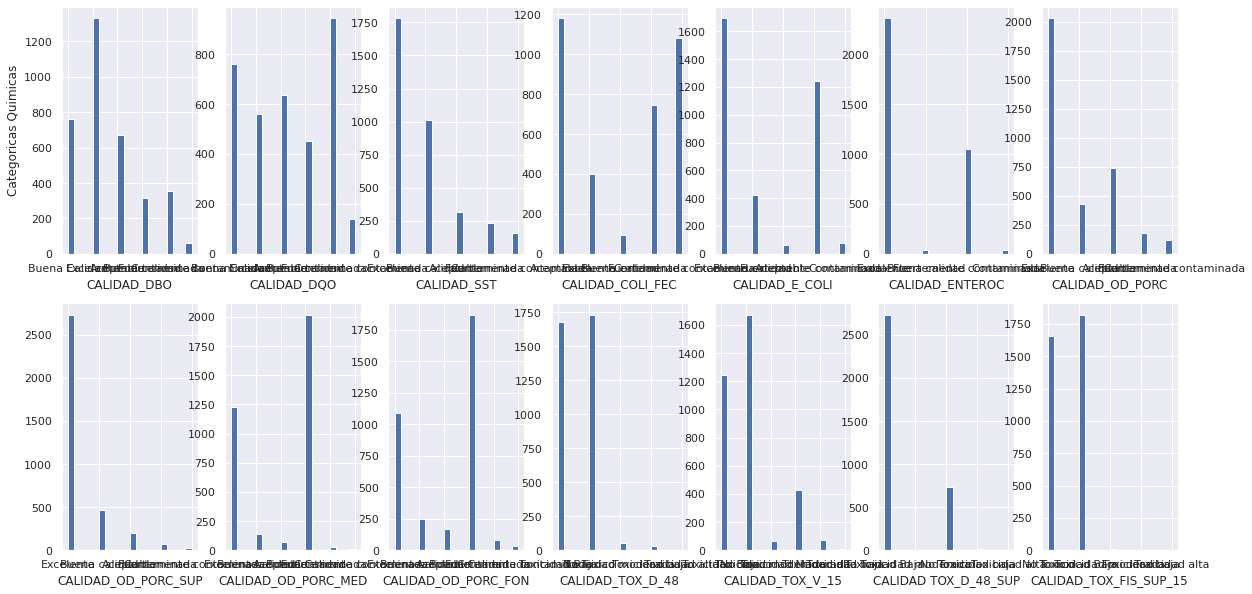

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2, 7)   
for k in range(0,14):  
  plt.subplot(2,7,k+1) 

  Transf0 = df_limpio_ASuperficiales[CategoriasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(CategoriasQuimicas[k])

 
  if k==0:
    plt.ylabel('Categoricas Quimicas')

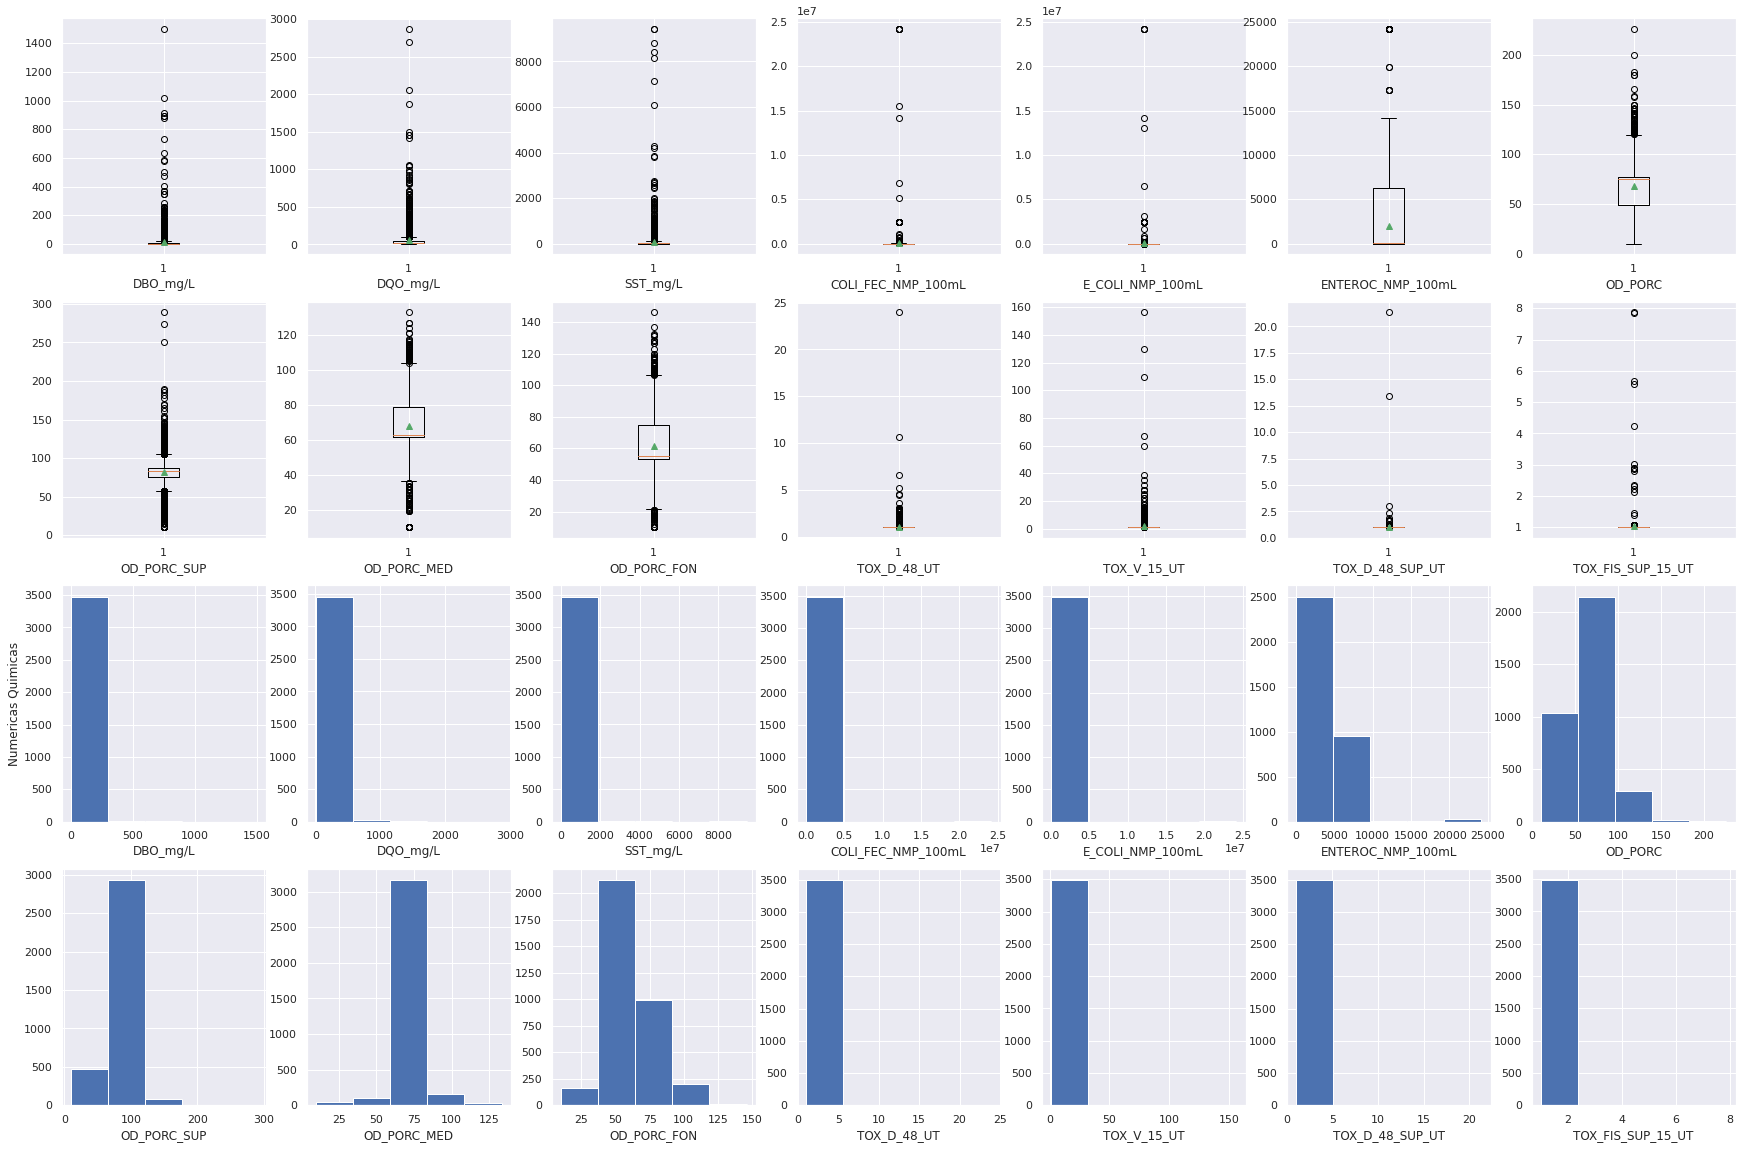

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
fig, axes = plt.subplots(4, 7)   
for k in range(0,14):  
  plt.subplot(4,7,k+1) 

  Transf0 = df_limpio_ASuperficiales[NumericasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.boxplot(Transf0, showmeans= True) 
  plt.xlabel(NumericasQuimicas[k])

  plt.subplot(4,7,k+15) 

  Transf0 = df_limpio_ASuperficiales[NumericasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=5) 
  plt.xlabel(NumericasQuimicas[k])


  if k==0:
    plt.ylabel('Numericas Quimicas')

Veamos ya con la limpieza de los datos que tanto se correlacionan las variables entre ellas.

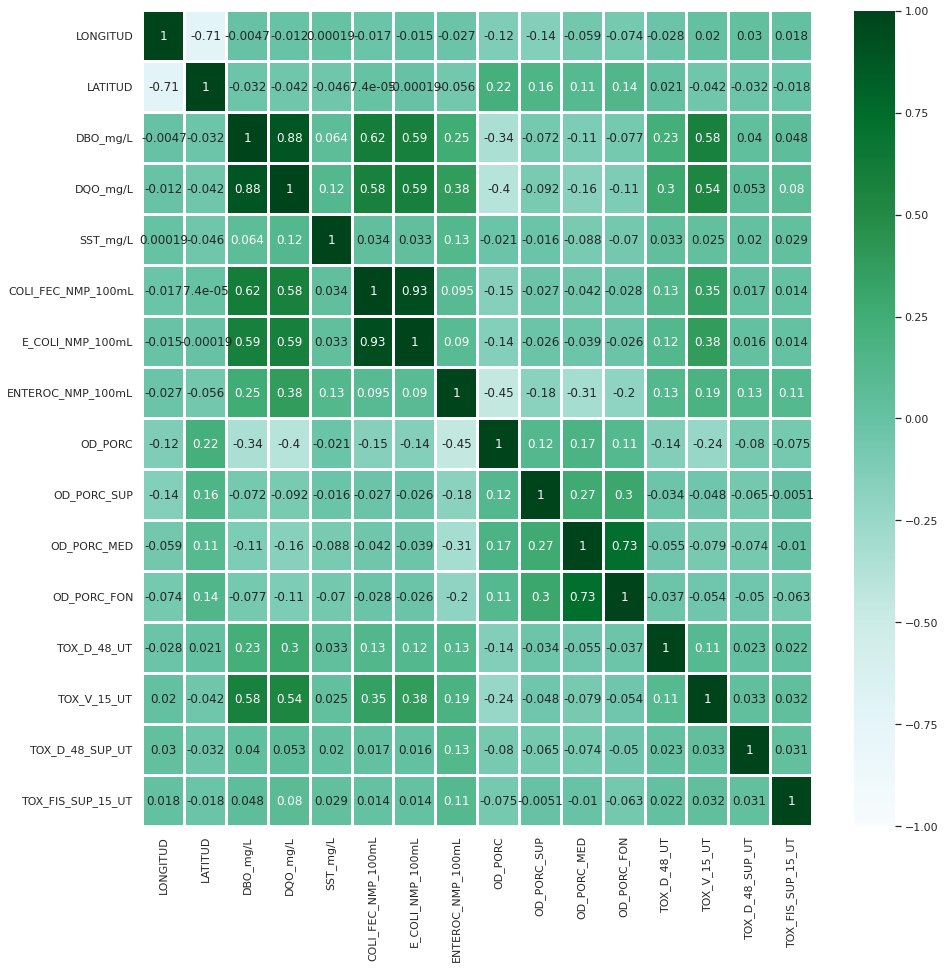

In [ ]:
df_limpio_ASuperficiales.corr()
corrs = df_limpio_ASuperficiales.drop('PERIODO', axis = 'columns').corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)

In [ ]:
#Leemos el Dataset de Aguas Superficiales para empezar limpieza

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',  encoding='latin-1')
df2

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


#**Limpieza Aguas Subterraneas**

Para este Dataset sera la misma filosofia, por ende llegaremos a la mismas conclusiones y no habra mas que comentarios muy puntuales de las diferencias.

In [ ]:
#Leemos el Dataset de Aguas Superficiales para empezar limpieza

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',  encoding='latin-1')
df2

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#En nuestra primer etapa de validación de información, decidimos primero ubicar las columnas con elementos vacios
df2.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df2.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

##Al analizar el Dataset, podemos notar que el semaforo es nuestra principal fuente de indicacion es el semaforo. Por ende haremos una limpieza siguiendo lo siguiente:



###1. Evaluaremos 3 data sets, uno para cada semaforo y trabajar con sus NaN y faltantes de manera separada.

Primero crearemos una lista de las variables numericas quimicas, aqui procederemos a eliminar datos cadena como '< 2' para poder convertirlos a datos numeros cercanos al valor que indican y ademas procederemos a llenar los valores NaN con la media total del dataset a trabajar, osea que no llenaremos todo el dataset con una media genera, sino que buscaremos aislar cada tipo y aplicarle una media de acuerdo a su color.

In [ ]:
df_verde2 = df2[df2.SEMAFORO == 'Verde'].copy()
df_rojo2 = df2[df2.SEMAFORO == 'Rojo'].copy()
df_amarillo2 = df2[df2.SEMAFORO == 'Amarillo'].copy()


In [ ]:
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]
print(len(NumericasQuimicas2))

15


In [ ]:
#Limpieza Verdes
lista_verde2 = list()
lista_rojo2 = list()
lista_amarillo2 = list()

for name in NumericasQuimicas2:
  df_verde2[name] = df_verde2[name].astype('str')
  df_verde2[name] = df_verde2[name].str.replace('<25','25') 
  df_verde2[name] = df_verde2[name].str.replace('<0.2','0.2') 
  df_verde2[name] = df_verde2[name].str.replace('<20','20') 
  df_verde2[name] = df_verde2[name].str.replace('<1.1','1.1')
  df_verde2[name] = df_verde2[name].str.replace('<0.02','0.02') 
  df_verde2[name] = df_verde2[name].str.replace('<0.01','0.01') 
  df_verde2[name] = df_verde2[name].str.replace('<0.003','0.003')
  df_verde2[name] = df_verde2[name].str.replace('<0.005','0.004') 
  df_verde2[name] = df_verde2[name].str.replace('<0.0005','0.0004') 
  df_verde2[name] = df_verde2[name].str.replace('<0.0015','0.0015') 
  df_verde2[name] = df_verde2[name].str.replace('<0.025','0.025')  
  df_verde2[name]= df_verde2[name].astype('float')
  mean = df_verde2[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_verde2[name]= df_verde2[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_verde2.append([name, mean])
  

#Limpieza Rojo
for name in NumericasQuimicas2:
  df_rojo2[name] = df_rojo2[name].astype('str')
  df_rojo2[name] = df_rojo2[name].str.replace('<25','25') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.2','0.2') 
  df_rojo2[name] = df_rojo2[name].str.replace('<20','20') 
  df_rojo2[name] = df_rojo2[name].str.replace('<1.1','1.1')
  df_rojo2[name] = df_rojo2[name].str.replace('<0.02','0.02') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.01','0.01') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.003','0.003')
  df_rojo2[name] = df_rojo2[name].str.replace('<0.005','0.004') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.0005','0.0004') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.0015','0.0015') 
  df_rojo2[name] = df_rojo2[name].str.replace('<0.025','0.025')  
  df_rojo2[name]= df_rojo2[name].astype('float')
  mean = df_rojo2[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_rojo2[name]= df_rojo2[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_rojo2.append([name, mean])

#Limpieza Amarillo
for name in NumericasQuimicas2:
  df_amarillo2[name] = df_amarillo2[name].astype('str')
  df_amarillo2[name] = df_amarillo2[name].str.replace('<25','25') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.2','0.2') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<20','20') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<1.1','1.1')
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.02','0.02') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.01','0.01') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.003','0.003')
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.005','0.004') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.0005','0.0004') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.0015','0.0015') 
  df_amarillo2[name] = df_amarillo2[name].str.replace('<0.025','0.025')   
  df_amarillo2[name]= df_amarillo2[name].astype('float')
  mean = df_amarillo2[name].mean() #Here we will obtain the Mean of the columns engine-size
  df_amarillo2[name]= df_amarillo2[name].replace(np.nan, mean) #Here we will replace the data NaN with the mean value of the specific data
  lista_amarillo2.append([name, mean])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWar

### 2. Para este paso haremos una comparacion con las escalas del archivo de tratamientos para aplicarles en base a los nuevos datos rellenados con la media su correcta escala de acuerdo a la tabla.

In [ ]:
dfescala2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto DS/Escalas_subterranea.csv',  encoding='latin-1')
dfescala2

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....
...,...,...,...
61,CALIDAD DEL AGUA PARA DUREZA,CRITERIO,DESCRIPCION
62,Potable - Suave,DUR menor o igual a 60,Agua potable. Bajo contenido de minerales
63,Potable - Moderadamente suave,DUR mayor de 60 y menor o igual a 120,Agua potable. Moderado contenido de minerales
64,Potable - Dura,DUR mayor de 120 y menor o igual a 500,"Agua potable. Alto contenido de minerales, pri..."


Utilizando el promedio de los datos para rellenar valores, ahora asignaremos la etiqueta correspondiente al valor acorde a las escalas dadas por el dataset

In [ ]:
#DataFrame para valores de verde
escala_verde2 = ['Alta','Buena para riego','NaN','Potable - Dulce','Media','Potable - Dura','Buena calidad',
                 'Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente','Potable - Excelente',
                 'Potable - Excelente','Potable - Excelente','Potable - Excelente']
Verde_df_means2 = pd.DataFrame(lista_verde2, columns = ['Nombre','Valor de la media'])
Verde_df_means2['Escala Nueva'] = escala_verde2
Verde_df_means2

,Nombre,Valor de la media,Escala Nueva
0,ALC_mg/L,201.975590,Alta
1,CONDUCT_mS/cm,676.740139,Buena para riego
2,SDT_mg/L,NaN,NaN
3,SDT_M_mg/L,459.188794,Potable - Dulce
4,FLUORUROS_mg/L,0.507428,Media
5,DUR_mg/L,214.694874,Potable - Dura
6,COLI_FEC_NMP/100_mL,27.924885,Buena calidad
7,N_NO3_mg/L,2.660065,Potable - Excelente
8,AS_TOT_mg/L,0.010583,Potable - Excelente
9,CD_TOT_mg/L,0.003000,Potable - Excelente


In [ ]:
#Data Frame para Rojo
escala_rojo2 = ['Alta','Permisible para riego','NaN','Potable - Dulce','Alta','Potable - Dura','Aceptable',
                 'Potable - Buena calidad','Apta como FAAP','Apta como FAAP','Potable - Excelente','Potable - Excelente',
                 'Potable - Excelente','Potable - Excelente','Sin efectos en la salud - Puede dar color al agua']
Rojo_df_means2 = pd.DataFrame(lista_rojo2, columns = ['Nombre','Valor de la media'])
Rojo_df_means2['Escala Nueva'] = escala_rojo2
Rojo_df_means2

,Nombre,Valor de la media,Escala Nueva
0,ALC_mg/L,242.595351,Alta
1,CONDUCT_mS/cm,1251.816104,Permisible para riego
2,SDT_mg/L,NaN,NaN
3,SDT_M_mg/L,896.738515,Potable - Dulce
4,FLUORUROS_mg/L,2.090002,Alta
5,DUR_mg/L,334.629137,Potable - Dura
6,COLI_FEC_NMP/100_mL,927.088372,Aceptable
7,N_NO3_mg/L,7.207844,Potable - Buena calidad
8,AS_TOT_mg/L,0.035542,Apta como FAAP
9,CD_TOT_mg/L,0.003082,Apta como FAAP


In [ ]:
escala_amarillo2 = ['Alta','Permisible para riego','NaN','Ligeramente salobres','Media','Muy dura e indeseable usos industrial y domestico','Buena calidad',
                 'Potable - Buena calidad','Apta como FAAP','Potable - Excelente','No apta como FAAP','Potable - Excelente',
                 'Potable - Excelente','Sin efectos en la salud - Puede dar color al agua','Sin efectos en la salud - Puede dar color al agua']
Amarillo_df_means2 = pd.DataFrame(lista_amarillo2, columns = ['Nombre','Valor de la media'])
Amarillo_df_means2['Escala Nueva'] = escala_amarillo2
Amarillo_df_means2

,Nombre,Valor de la media,Escala Nueva
0,ALC_mg/L,283.650425,Alta
1,CONDUCT_mS/cm,1772.129675,Permisible para riego
2,SDT_mg/L,NaN,NaN
3,SDT_M_mg/L,1665.915718,Ligeramente salobres
4,FLUORUROS_mg/L,0.484559,Media
5,DUR_mg/L,602.370717,Muy dura e indeseable usos industrial y domestico
6,COLI_FEC_NMP/100_mL,35.470040,Buena calidad
7,N_NO3_mg/L,2.704206,Potable - Buena calidad
8,AS_TOT_mg/L,0.010542,Apta como FAAP
9,CD_TOT_mg/L,0.003000,Potable - Excelente


###3. Una vez categorizadas las medias de acuerdo a la escala, procederemos a aplicar estas etiquetas en las columnas categoricas que alojan la etiqueta de escala de cada variable quimica.

In [ ]:
CategoriasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']
print(len(CategoriasQuimicas2))

15


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoriasQuimicas2:
  if name == 'CALIDAD_ALC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Alta')
  if name == 'CALIDAD_CONDUC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Buena para riego') 
  if name == 'CALIDAD_SDT_ra':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', '') 
  if name == 'CALIDAD_SDT_salin':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Dulce') 
  if name == 'CALIDAD_FLUO':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Media') 
  if name == 'CALIDAD_DUR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Dura') 
  if name == 'CALIDAD_COLI_FEC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Buena calidad') 
  if name == 'CALIDAD_N_NO3':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_AS':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_CD':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_CR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_HG':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_PB':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_MN':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_FE':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('nan', 'Potable - Excelente') 
  


In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoriasQuimicas2:
  if name == 'CALIDAD_ALC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Alta')
  if name == 'CALIDAD_CONDUC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Permisible para riego') 
  if name == 'CALIDAD_SDT_ra':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', '') 
  if name == 'CALIDAD_SDT_salin':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Dulce') 
  if name == 'CALIDAD_FLUO':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Alta') 
  if name == 'CALIDAD_DUR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Dura') 
  if name == 'CALIDAD_COLI_FEC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_N_NO3':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_AS':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Apta como FAAP') 
  if name == 'CALIDAD_CD':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Apta como FAAP') 
  if name == 'CALIDAD_CR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_HG':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_PB':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_MN':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_FE':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('nan', 'Sin efectos en la salud - Puede dar color al agua')

In [ ]:
#Limpieza de las categorias de Amarillo
for name in CategoriasQuimicas2:
  if name == 'CALIDAD_ALC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Alta')
  if name == 'CALIDAD_CONDUC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Permisible para riego') 
  if name == 'CALIDAD_SDT_ra':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', '') 
  if name == 'CALIDAD_SDT_salin':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Ligeramente salobres') 
  if name == 'CALIDAD_FLUO':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Media') 
  if name == 'CALIDAD_DUR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Muy dura e indeseable usos industrial y domestico') 
  if name == 'CALIDAD_COLI_FEC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Buena calidad') 
  if name == 'CALIDAD_N_NO3':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Buena calidad') 
  if name == 'CALIDAD_AS':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Apta como FAAP') 
  if name == 'CALIDAD_CD':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'No apta como FAAP') 
  if name == 'CALIDAD_CR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_HG':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_PB':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Potable - Excelente') 
  if name == 'CALIDAD_MN':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Sin efectos en la salud - Puede dar color al agua') 
  if name == 'CALIDAD_FE':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('nan', 'Sin efectos en la salud - Puede dar color al agua')

###4. Despues tenemos unas columnas que nos dicen si un dato cumple o no con cierta certificacion, por ende con la nueva informacion almacenada en las columanas procedemos a etiquetar si los valores cumplen o no con el nuevo valor.

In [ ]:
CategoricasCumplimiento2 = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR',
                            'CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']
print(len(CategoricasCumplimiento2))

15


In [ ]:
#Limpieza de las categorias de Verde
for name in CategoricasCumplimiento:
  if name == 'CUMPLE_CON_ALC':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_ra':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_salin':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FLUO':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_DUR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_NO3':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_AS':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CD':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CR':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_HG':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_PB':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_MN':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FE':
    df_verde2[name]= df_verde2[name].astype('str')
    df_verde2[name]= df_verde2[name].replace('ND', 'SI')   

In [ ]:
#Limpieza de las categorias de Rojo
for name in CategoricasCumplimiento2:
  if name == 'CUMPLE_CON_ALC':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_ra':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_salin':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FLUO':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_DUR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_NO3':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_AS':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CD':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CR':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_HG':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_PB':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_MN':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FE':
    df_rojo2[name]= df_rojo2[name].astype('str')
    df_rojo2[name]= df_rojo2[name].replace('ND', 'SI') 

In [ ]:
#Limpieza de las categorias de amarillas
for name in CategoricasCumplimiento2:
  if name == 'CUMPLE_CON_ALC':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_ra':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_SDT_salin':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FLUO':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_DUR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_NO3':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_AS':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_COND':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CD':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CR':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_HG':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_PB':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_MN':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_FE':
    df_amarillo2[name]= df_amarillo2[name].astype('str')
    df_amarillo2[name]= df_amarillo2[name].replace('ND', 'SI') 

###Para finalizar agrupamos los 3 dataset ya limpiados en uno general para trabajar sobre este, ademas de aplicar un shuffle para no tener una orden muy especifico que pudiera sesgar a los modelos.

In [ ]:
from sklearn.utils import shuffle
df_limpio_ASubterraneas = pd.concat([df_verde2, df_rojo2, df_amarillo2]).reset_index(drop=True)
# df_shuffled2 = pd.concat([df_verde2, df_rojo2, df_amarillo2])
# df_limpio_ASubterraneas=df_shuffled2.sample(frac=1).reset_index(drop=True)
df_limpio_ASubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1068 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1068 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df_limpio_ASubterraneas.head(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
5,DLBAJ119,AGUA AMARGA Y SAN PEDRO MEXICO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-109.907091,23.946320,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,DLBAJ122,EL TRIUNFO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.108253,23.807347,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
7,DLBAJ129,"SP. A.P. 1, L. 9, COL. SIN.",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,SANTO DOMINGO,POZO,-111.720090,25.135490,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,DLBAJ130,L. 16-17 COL. LAGUNA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,SANTO DOMINGO,POZO,-111.803800,25.240100,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
9,DLBAJ148,"RANCHO AGUA DULCE, GVO. GLEZ.",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LORETO,SAN JUAN B. LONDO,POZO,-111.485700,26.227900,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df_limpio_ASubterraneas.drop(['CONTAMINANTES', 'SDT_mg/L'], axis = 'columns', inplace = True)
df_limpio_ASubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1068 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1068 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

###Quitaremos del Dataset las columnas de CONTAMINANTES, ya que es una columna muy redundante y no aporta mucho valor a futuros analisis y ademas las columnsa SDT_mg/L  ya que sus valores estan vacios en todas las casillas

###Analizemos las medidas de tendencia Central

In [ ]:
#volvemos a cargar las variables sin las columnas ya eliminadas
NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

CategoriasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

In [ ]:
print(len(NumericasQuimicas2), len(CategoriasQuimicas2))

14 15


In [ ]:
df_limpio_ASubterraneas[NumericasQuimicas2].describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.583766,1138.458879,896.822963,1.075600,347.813313,355.490356,4.318205,0.019618,0.003030,0.012476,0.000467,0.004310,0.072478,0.410387
std,116.664494,1242.459195,2749.051551,1.924278,359.523990,2052.457014,8.341377,0.035209,0.000894,0.154435,0.000479,0.003342,0.376512,5.537974
min,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
25%,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
50%,215.527500,815.000000,551.400000,0.503500,245.175900,1.100000,2.082916,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.046960
75%,292.423750,1322.250000,917.000000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.004000,0.000400,0.004000,0.009947,0.173380
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


###Grafiquemos para ver outliers y distribucion de datos en variables categoricas y numericas

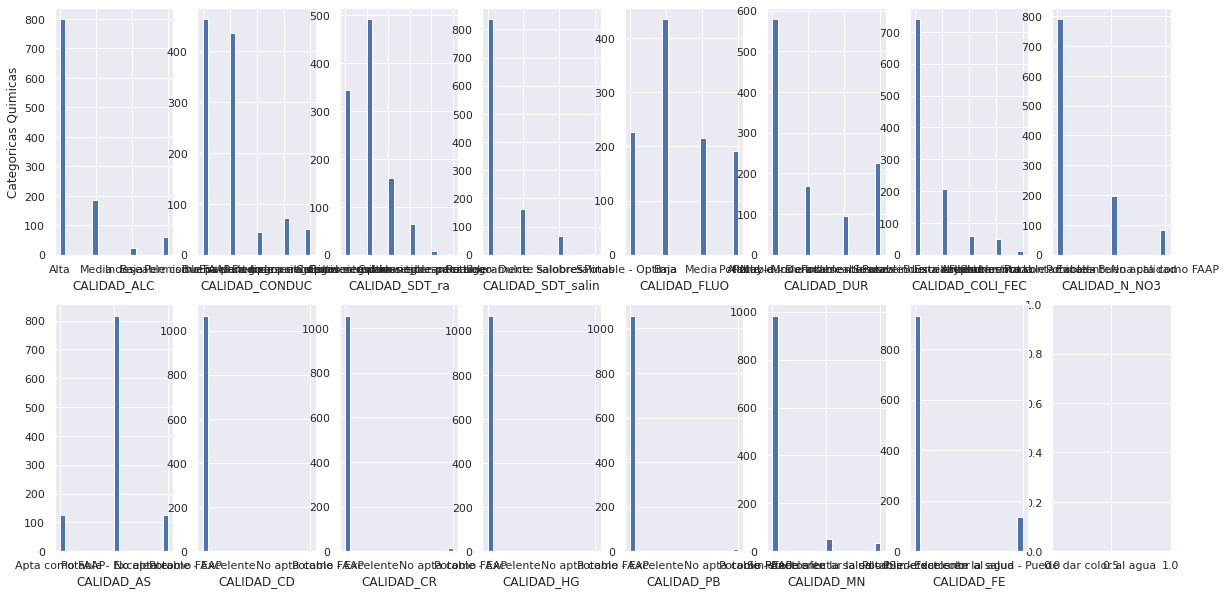

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2, 8)   
for k in range(0,15):  
  plt.subplot(2,8,k+1) 

  Transf0 = df_limpio_ASubterraneas[CategoriasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(CategoriasQuimicas2[k])

 
  if k==0:
    plt.ylabel('Categoricas Quimicas')

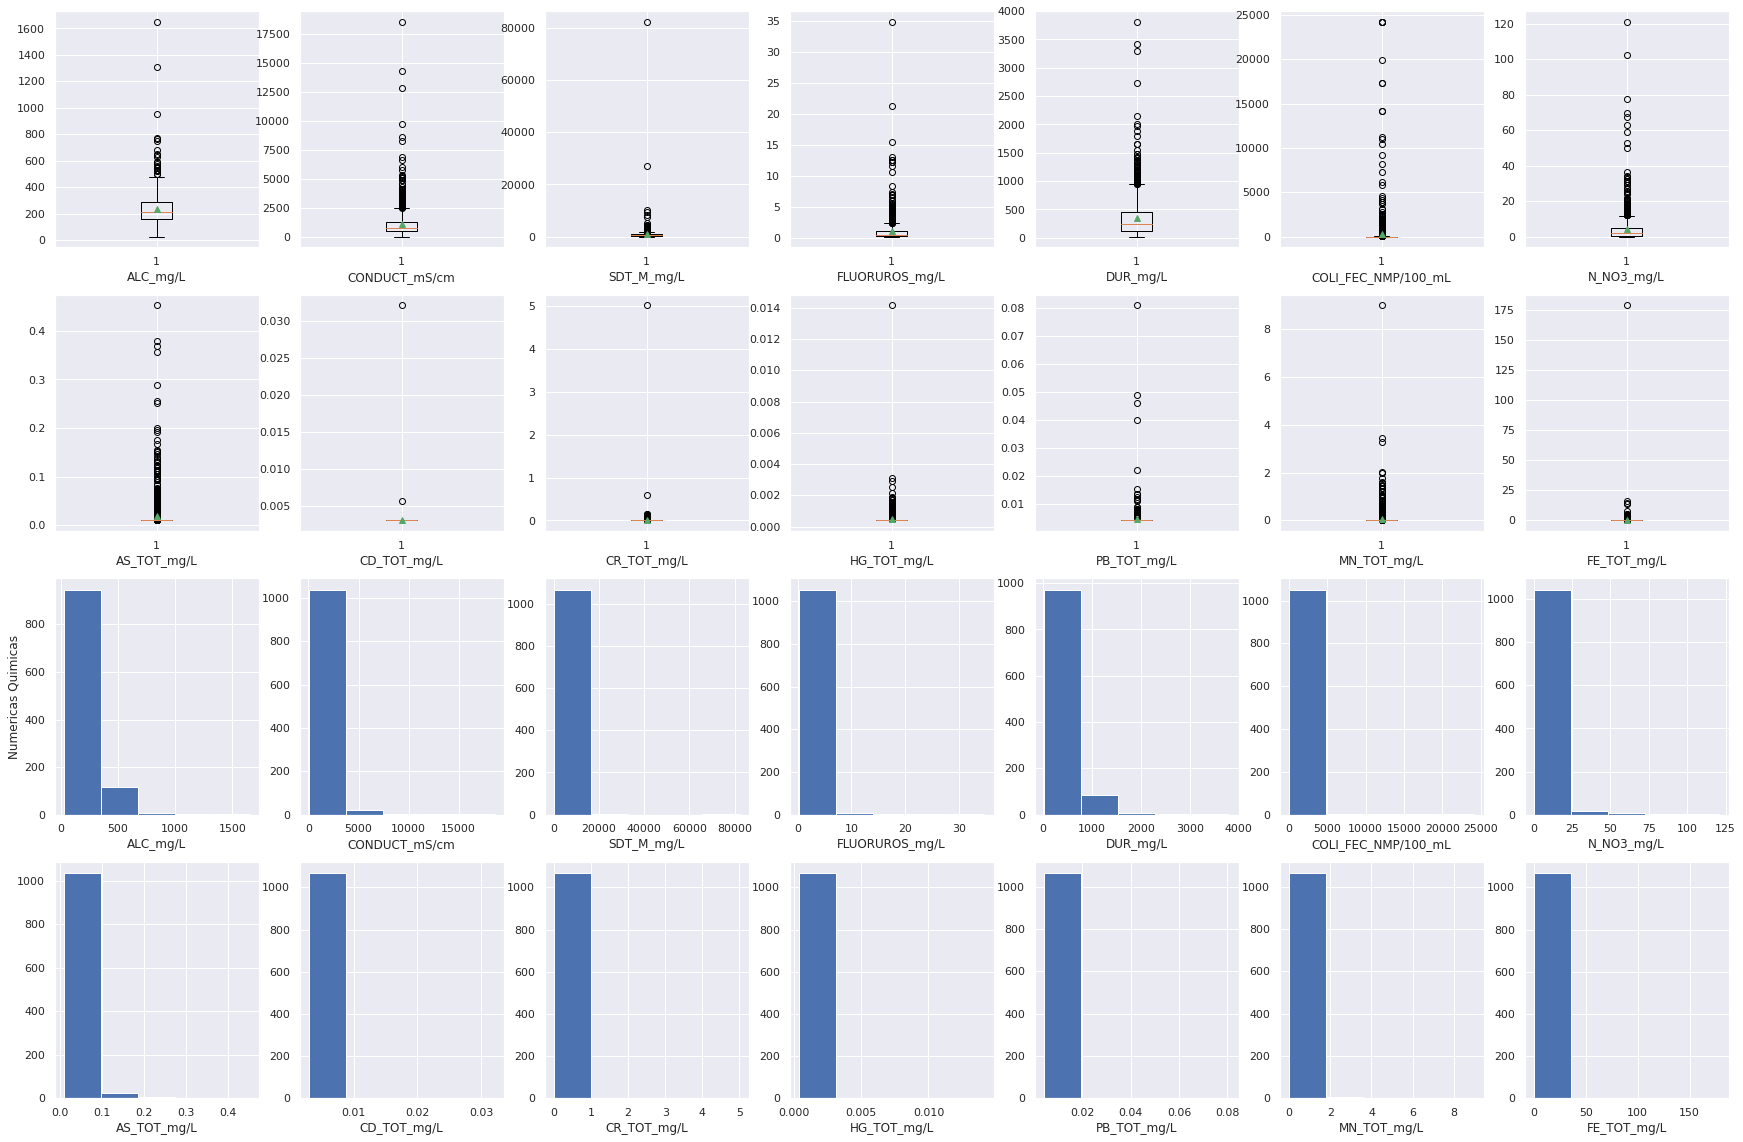

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
fig, axes = plt.subplots(4, 7)   
for k in range(0,14):  
  plt.subplot(4,7,k+1) 

  Transf0 = df_limpio_ASubterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.boxplot(Transf0, showmeans= True) 
  plt.xlabel(NumericasQuimicas2[k])

  plt.subplot(4,7,k+15) 

  Transf0 = df_limpio_ASubterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=5) 
  plt.xlabel(NumericasQuimicas2[k])


  if k==0:
    plt.ylabel('Numericas Quimicas')

Veamos ya con la limpieza de los datos que tanto se correlacionan las variables entre ellas.

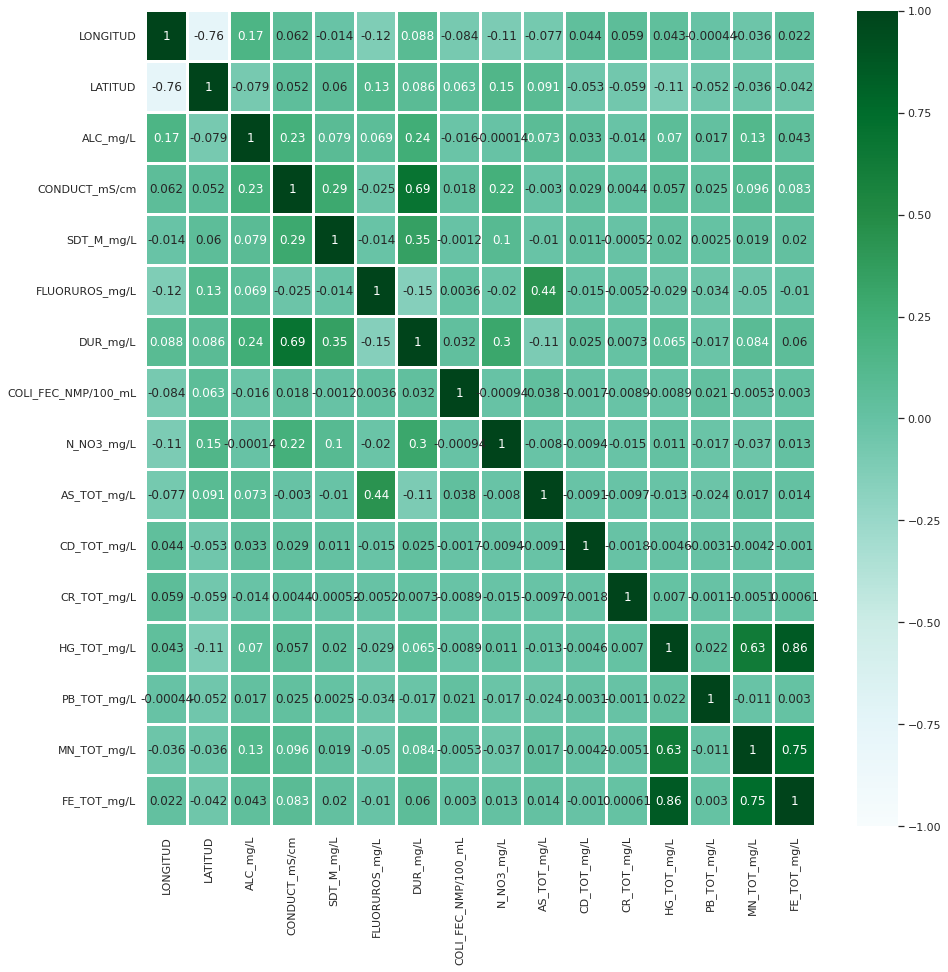

In [ ]:
df_limpio_ASubterraneas.corr()
corrs = df_limpio_ASubterraneas.drop('PERIODO', axis = 'columns').corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 2)

#Kmeans

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.1 MB/s 
     |████████████████████████████████| 1.0 MB 56.3 MB/s 
     |████████████████████████████████| 1.7 MB 57.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 39.3 MB/s 
     |████████████████████████████████| 6.3 MB 44.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=71c63ebe732e76a5c3fc5b9e3ee2d5ef9d249684345684f536fa872ee3ae08f7
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5ee30a1497d92a2da83a124bf1230a2866c4a3bc1a87a3b7218c4ac4a8aaacc7
  Stored in directory: /root/.

In [ ]:
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from statistics import mode 

##Kmeans para Aguas Superficiales

## La idea de este ejercicio es tratar de encontrar una relacion entre los puntos, los clusters que se generan buscar una relacion entre la localizacion de los mismos y la contaminacion que pudiera estar mas presente en esa area.



### 1. Por ende se hara un tratamiento de los datos, donde generaremos primeramente los puntos geograficos 

In [ ]:
df_limpio_ASuperficiales.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,SEMAFORO,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,Verde,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,Verde,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,Verde,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,Verde,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,Verde,SI,SI,SI,SI,SI,SI,SI,SI,COSTERO


In [ ]:
df_limpio_ASuperficiales["SEMAFORO"]

1          Verde
2          Verde
3          Verde
4          Verde
5          Verde
          ...   
3484    Amarillo
3485    Amarillo
3488    Amarillo
3491    Amarillo
3492    Amarillo
Name: SEMAFORO, Length: 3493, dtype: object

In [ ]:
lbe = LabelEncoder()
df_limpio_ASuperficiales["SEMAFORO_Type"]= lbe.fit_transform(df_limpio_ASuperficiales["SEMAFORO"])
df_limpio_ASuperficiales["SEMAFORO_Type"].unique()


array([2, 1, 0])

In [ ]:
df_limpio_ASuperficiales[['SEMAFORO','SEMAFORO_Type']]

,SEMAFORO,SEMAFORO_Type
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
...,...,...
3484,Amarillo,0
3485,Amarillo,0
3488,Amarillo,0
3491,Amarillo,0


In [ ]:
df_limpio_ASuperficiales["Coordinates"] = list(zip(df_limpio_ASuperficiales.LONGITUD, df_limpio_ASuperficiales.LATITUD))
df_limpio_ASuperficiales["Coordinates"] = df_limpio_ASuperficiales["Coordinates"].apply(Point)
df_limpio_ASuperficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,SEMAFORO_Type,Coordinates
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.8429 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.86442 22.8988)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.89657 22.87694)
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.9025 22.88)


In [ ]:
gdf_Superficiales = gpd.GeoDataFrame(df_limpio_ASuperficiales, geometry="Coordinates")
gdf_Superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,SEMAFORO_Type,Coordinates
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.89657 22.87694)
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.90250 22.88000)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

Probamos la dispersion de las coordenadas con un ploteo simple, y sin ningun tipo de agrupación

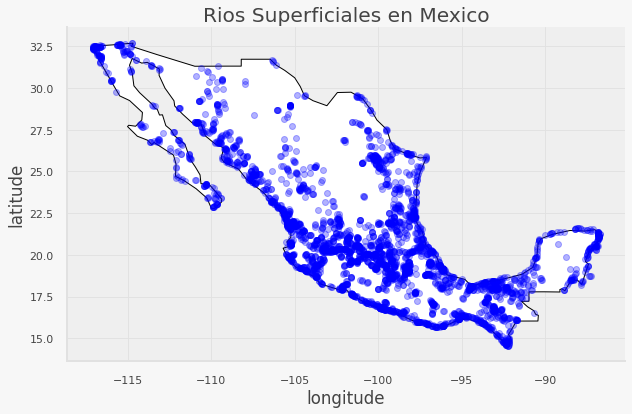

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_Superficiales.plot(ax=gax, color='Blue', alpha = 0.3)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Rios Superficiales en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
X_Superficial = df_limpio_ASuperficiales[["LATITUD","LONGITUD"]]
X_Superficial

,LATITUD,LONGITUD
1,22.90473,-109.84290
2,22.89880,-109.86442
3,22.89609,-109.88604
4,22.87694,-109.89657
5,22.88000,-109.90250
...,...,...
3484,26.45120,-99.15277
3485,26.55448,-99.17006
3488,26.78971,-99.42142
3491,27.49631,-99.52221


In [ ]:
y_Superficial = df_limpio_ASuperficiales[["SEMAFORO_Type"]]
y_Superficial

,SEMAFORO_Type
1,2
2,2
3,2
4,2
5,2
...,...
3484,0
3485,0
3488,0
3491,0


###3. En este punto empezaremos a tabajar con KMeans. haremos una validacion por medio de la libreria yellowbrick para obtenet el punto codo optimo de acuerdo a un rango de cluster a evaluar.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

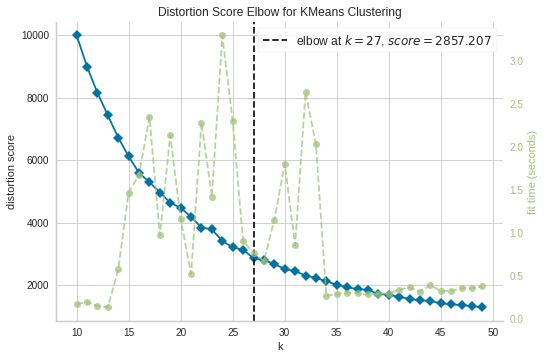

In [ ]:
X_Sl = list(zip(df_limpio_ASuperficiales.LONGITUD, df_limpio_ASuperficiales.LATITUD))
blob_centers = X_Sl
X_cluster = X_Superficial.copy()
y_cluster = y_Superficial.copy()
X_cluster, y_cluster = make_blobs(n_samples=3493, centers = blob_centers, cluster_std = 0.20, random_state=42)

model = KElbowVisualizer(KMeans(), k=(10,50))
model.fit(X_Superficial)
model.show()

### 4.  Teniendo identificado el numero de clusters optimos para cubrir toda la superfivie, se procede a añadir una columna con las coordenadas en formato punto para GeoPandas, y ademas a cada punto, se le asigna un número de cluster.

In [ ]:
kmeans = KMeans(n_clusters=model.elbow_value_, random_state=42).fit(X_Superficial, y_Superficial)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X_Superficial)
yhat = pd.DataFrame(labels).value_counts()
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[1], C_DF[0]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_superficiales = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_superficiales ["Numero de cluster"] = " "
gdf_C_superficiales ["Puntos asignados al Cluster"] = " "

for cluster_number in labels:
   gdf_C_superficiales["Numero de cluster"][cluster_number]= cluster_number
   gdf_C_superficiales ["Puntos asignados al Cluster"][cluster_number] = yhat[cluster_number]

gdf_C_superficiales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,Coordinates,Numero de cluster,Puntos asignados al Cluster
0,16.216081,-96.237464,POINT (-96.23746 16.21608),0,158
1,19.409551,-104.228038,POINT (-104.22804 19.40955),1,182
2,32.041546,-115.968500,POINT (-115.96850 32.04155),2,121
3,26.247941,-108.881303,POINT (-108.88130 26.24794),3,96
4,20.547706,-97.527973,POINT (-97.52797 20.54771),4,115
5,19.425755,-89.483905,POINT (-89.48391 19.42575),5,69
6,25.565014,-99.390044,POINT (-99.39004 25.56501),6,170
7,24.254121,-107.071402,POINT (-107.07140 24.25412),7,97
8,19.276080,-99.438211,POINT (-99.43821 19.27608),8,217
9,18.034841,-92.212097,POINT (-92.21210 18.03484),9,133


Aqui estamos revisando que realmente no estamos prediciendo que color de semaforo se asignaria a un cluster en especifico ni mucho menos, solo que vamos a realizar un acomo geografico a cada cluster

In [ ]:
yhat = pd.DataFrame(labels).value_counts()
yhat

10    230
26    229
8     217
12    198
15    182
1     182
13    175
19    174
6     170
0     158
14    147
20    138
23    136
9     133
2     121
4     115
21     99
17     98
7      97
3      96
16     84
22     73
5      69
11     52
25     46
24     42
18     32
dtype: int64

Aqui generamos un dataframe para asignar un valor de cluster a cada punto y ademas tomar el valor de semaforo correspondiente tambien a cada punto.

In [ ]:
DF_Cluster_Superficial = X_Superficial.copy()
DF_Cluster_Superficial ["ClusterAsignado"] = labels
DF_Cluster_Superficial["Semaforo"] = df_limpio_ASuperficiales["SEMAFORO_Type"].values
DF_Cluster_Superficial


,LATITUD,LONGITUD,ClusterAsignado,Semaforo
1,22.90473,-109.84290,25,2
2,22.89880,-109.86442,25,2
3,22.89609,-109.88604,25,2
4,22.87694,-109.89657,25,2
5,22.88000,-109.90250,25,2
...,...,...,...,...
3484,26.45120,-99.15277,6,0
3485,26.55448,-99.17006,6,0
3488,26.78971,-99.42142,6,0
3491,27.49631,-99.52221,24,0


Aqui vamos a sacar la moda de cada conjunto de cluster, para con ello obtener valores que mas se repitan por cluster y con ello ver segun la particion de clusters tener un claro panorama de la contaminacion presente por area.

In [ ]:
DF_Cluster_Superficial[DF_Cluster_Superficial.ClusterAsignado == 22]

,LATITUD,LONGITUD,ClusterAsignado,Semaforo
285,24.29637,-105.54945,22,2
286,24.55902,-105.85848,22,2
295,23.87358,-104.69426,22,2
296,23.87458,-104.67751,22,2
298,24.90783,-104.07961,22,2
...,...,...,...,...
1773,25.26567,-103.77764,22,0
1774,25.27506,-103.76833,22,0
1775,25.38702,-103.74252,22,0
1776,25.30185,-103.73193,22,0


In [ ]:
modas_PorCluster = []

for value in gdf_C_superficiales['Numero de cluster']:
  c = pd.DataFrame()
  c = DF_Cluster_Superficial[DF_Cluster_Superficial.ClusterAsignado == value].copy()
  moda = c['Semaforo'].mode()[0]
  modas_PorCluster.append(moda)

modas_PorCluster

[2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 1]

In [ ]:
df_limpio_ASuperficiales[["SEMAFORO","SEMAFORO_Type"]]

,SEMAFORO,SEMAFORO_Type
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
...,...,...
3484,Amarillo,0
3485,Amarillo,0
3488,Amarillo,0
3491,Amarillo,0


Segun el valor asignado por el Label encoder es el valor a tomar de la cluster por moda.

**Verde = 2**

**Amarillo = 0**

**Rojo = 1**

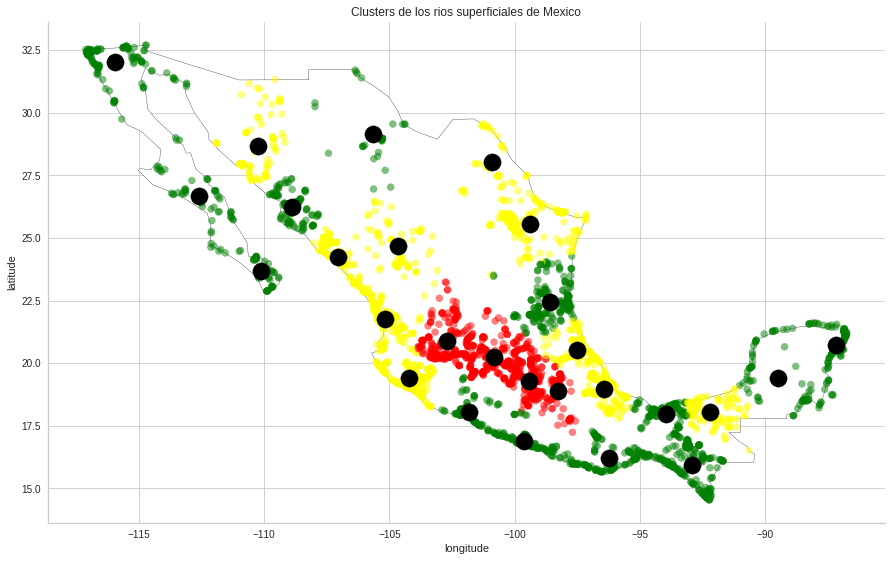

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))

colores = []

color_asig = []

for color in modas_PorCluster:
  if color == 0:
    colores.append('yellow')
  if color == 1:
    colores.append('red')
  if color == 2:
    colores.append('green')

for row in labels:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Superficiales.plot(ax=gax, color=color_asig, alpha = 0.5)
gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de los rios superficiales de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

**Podemos notar como el mapa hizo una distribucion de los clusters buscando las modas por cada particion y con ello eligiendo que tipo de contaminacion se presenta mas por zonas.**

***Mapa de Kmeans expresando la particion y distribucion de los datos.***

El siguiente codigo nos ayudara a expresar de manera mas grafica el comportamiento de los datos y modelo de Kmeans para ver de primera forma como el modelo esta partiendo el mapa de Mexico en los llamados cluster y como este asigna los centroides.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


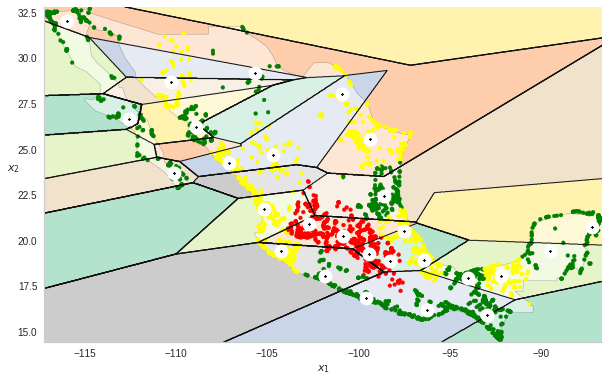

In [ ]:
def plot_data(X, moda, label):
    colores = []

    color_asig = []

    for color in moda:
      if color == 0:
        colores.append('yellow')
      if color == 1:
        colores.append('red')
      if color == 2:
        colores.append('green')

    for row in label:
       color_asig.append(colores[row])

    X["Coordinates"] = list(zip(X.LONGITUD, X.LATITUD))
    X["Coordinates"] = X["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(X, geometry="Coordinates")
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white',alpha=0.5)

    gdf.plot(ax=gax, color=color_asig, alpha = 1, markersize = 15)
    #gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)
    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=1)
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, modas, label, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    plt.contourf(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                cmap="Pastel2")
    plot_data(X, modas, label)
    plt.contour(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                linewidths=1, colors='k')
    
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


fig, gax = plt.subplots(figsize=(10,10))
plot_decision_boundaries(kmeans, X_Superficial, modas = modas_PorCluster, label = labels)
plt.show()

Finalmente, para compara como seria un mapa no coloreado por el promedio del cluster, se imprime un mapa con el color correspondiente a cada punto de acuerdo al semaforo.


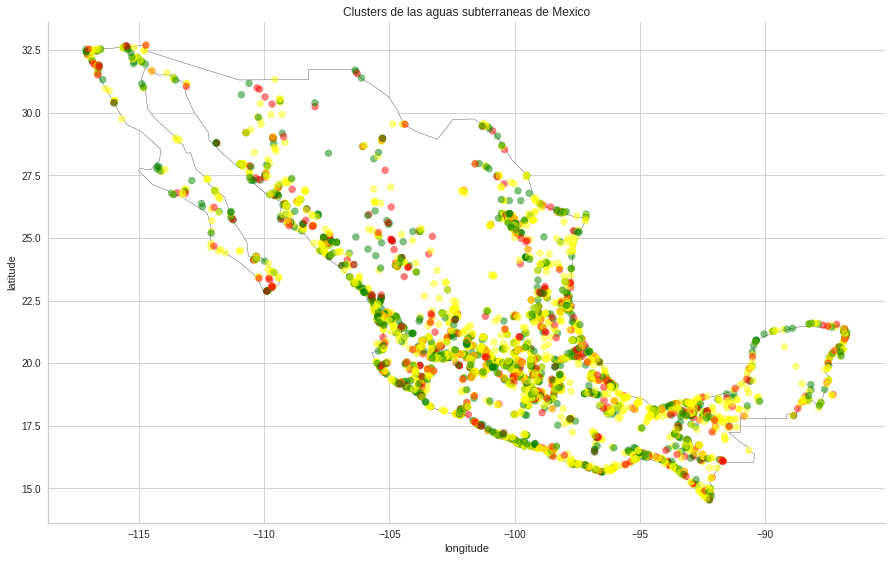

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(X_cluster, y_cluster)
centroids = kmeans2.cluster_centers_
labels3 = kmeans2.predict(X_cluster)
# Getting the cluster centers
C = kmeans2.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_superficiales3 = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_superficiales3


fig, gax = plt.subplots(figsize=(15,10))

colores = ['green','red','yellow']

color_asig = []

for row in labels3:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Superficiales.plot(ax=gax, color=color_asig, alpha = 0.5,)
#gdf_C_superficiales3.plot(ax=gax, color='black', alpha = 1, markersize = 300, label = "Centroid")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de las aguas subterraneas de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

##Kmeans para Aguas Subterraneas

**Para esta parte se seguira la misma logica que el pasado, por ende no habra comentarios mas que muy puntuales**

In [ ]:
df_limpio_ASubterraneas.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [ ]:
lbe = LabelEncoder()
df_limpio_ASubterraneas["SEMAFORO_Type"]= lbe.fit_transform(df_limpio_ASubterraneas["SEMAFORO"])
df_limpio_ASubterraneas["SEMAFORO_Type"].unique()


array([2, 1, 0])

In [ ]:
df_limpio_ASubterraneas[['SEMAFORO','SEMAFORO_Type']]

,SEMAFORO,SEMAFORO_Type
0,Verde,2
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
...,...,...
1063,Amarillo,0
1064,Amarillo,0
1065,Amarillo,0
1066,Amarillo,0


In [ ]:
df_limpio_ASubterraneas["Coordinates"] = list(zip(df_limpio_ASubterraneas.LONGITUD, df_limpio_ASubterraneas.LATITUD))
df_limpio_ASubterraneas["Coordinates"] = df_limpio_ASubterraneas["Coordinates"].apply(Point)
df_limpio_ASubterraneas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SEMAFORO_Type,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.20075 21.99958)
2,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.29449 22.18435)
3,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.21396 23.4746)
4,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.088778 23.799861)


In [ ]:
gdf_Subterraneas = gpd.GeoDataFrame(df_limpio_ASubterraneas, geometry="Coordinates")
gdf_Subterraneas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SEMAFORO_Type,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.20075 21.99958)
2,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-102.29449 22.18435)
3,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.21396 23.47460)
4,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.08878 23.79986)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

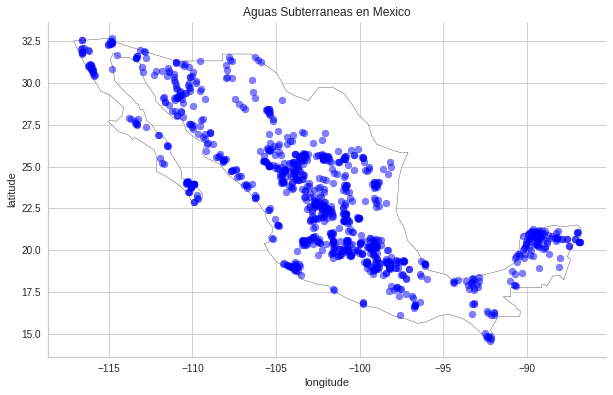

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_Subterraneas.plot(ax=gax, color='Blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
X_Subterranea = gdf_Subterraneas[["LATITUD","LONGITUD"]]
X_Subterranea

,LATITUD,LONGITUD
0,22.208870,-102.022100
1,21.999580,-102.200750
2,22.184350,-102.294490
3,23.474600,-110.213960
4,23.799861,-110.088778
...,...,...
1063,21.002222,-89.393611
1064,20.977778,-89.441667
1065,20.704360,-88.589530
1066,20.837920,-89.182510


In [ ]:
y_Subterranea = gdf_Subterraneas[["SEMAFORO_Type"]]
y_Subterranea

,SEMAFORO_Type
0,2
1,2
2,2
3,2
4,2
...,...
1063,0
1064,0
1065,0
1066,0


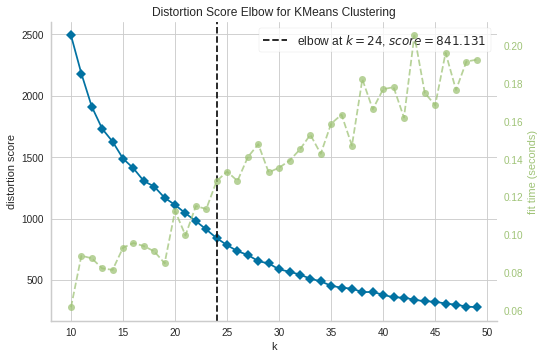

In [ ]:
X_Sl = list(zip(df_limpio_ASubterraneas.LONGITUD, df_limpio_ASubterraneas.LATITUD))
blob_centers = X_Sl
X_cluster = X_Subterranea.copy()
y_cluster = y_Subterranea.copy()
X_cluster2, y_cluster2 = make_blobs(n_samples=3493, centers = blob_centers, cluster_std = 0.20, random_state=42)

model = KElbowVisualizer(KMeans(), k=(10,50))
model.fit(X_Subterranea)
model.show()

In [ ]:
kmeans = KMeans(n_clusters=model.elbow_value_, random_state=42).fit(X_Subterranea, y_Subterranea)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X_Subterranea)
yhat = pd.DataFrame(labels).value_counts()
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[1], C_DF[0]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_subterraneas = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_subterraneas ["Numero de cluster"] = " "
gdf_C_subterraneas ["Puntos asignados al Cluster"] = " "

for cluster_number in labels:
   gdf_C_subterraneas["Numero de cluster"][cluster_number]= cluster_number
   gdf_C_subterraneas ["Puntos asignados al Cluster"][cluster_number] = yhat[cluster_number]

gdf_C_subterraneas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,Coordinates,Numero de cluster,Puntos asignados al Cluster
0,23.819670,-110.146688,POINT (-110.14669 23.81967),0,33
1,20.177643,-101.332662,POINT (-101.33266 20.17764),1,69
2,20.535159,-89.627607,POINT (-89.62761 20.53516),2,94
3,27.005056,-112.671813,POINT (-112.67181 27.00506),3,16
4,24.235305,-104.122289,POINT (-104.12229 24.23530),4,60
5,17.896362,-97.017586,POINT (-97.01759 17.89636),5,36
6,31.630070,-115.350697,POINT (-115.35070 31.63007),6,48
7,20.077643,-99.438754,POINT (-99.43875 20.07764),7,61
8,25.688821,-103.528281,POINT (-103.52828 25.68882),8,59
9,23.952611,-99.029425,POINT (-99.02942 23.95261),9,30


In [ ]:
DF_Cluster_Subterraneo = X_Subterranea.copy()
DF_Cluster_Subterraneo ["ClusterAsignado"] = labels
DF_Cluster_Subterraneo["Semaforo"] = df_limpio_ASubterraneas["SEMAFORO_Type"].values
DF_Cluster_Subterraneo

,LATITUD,LONGITUD,ClusterAsignado,Semaforo
0,22.208870,-102.022100,13,2
1,21.999580,-102.200750,13,2
2,22.184350,-102.294490,13,2
3,23.474600,-110.213960,0,2
4,23.799861,-110.088778,0,2
...,...,...,...,...
1063,21.002222,-89.393611,2,0
1064,20.977778,-89.441667,2,0
1065,20.704360,-88.589530,17,0
1066,20.837920,-89.182510,2,0


In [ ]:
modas_PorCluster = []

for value in gdf_C_subterraneas['Numero de cluster']:
  c = pd.DataFrame()
  c = DF_Cluster_Subterraneo[DF_Cluster_Subterraneo.ClusterAsignado == value].copy()
  moda = c['Semaforo'].mode()[0]
  modas_PorCluster.append(moda)

modas_PorCluster

[1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1]

In [ ]:
df_limpio_ASubterraneas[["SEMAFORO","SEMAFORO_Type"]]

,SEMAFORO,SEMAFORO_Type
0,Verde,2
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
...,...,...
1063,Amarillo,0
1064,Amarillo,0
1065,Amarillo,0
1066,Amarillo,0


Segun el valor asignado por el Label encoder es el valor a tomar de la cluster por moda.

**Verde = 2**

**Amarillo = 0**

**Rojo = 1**

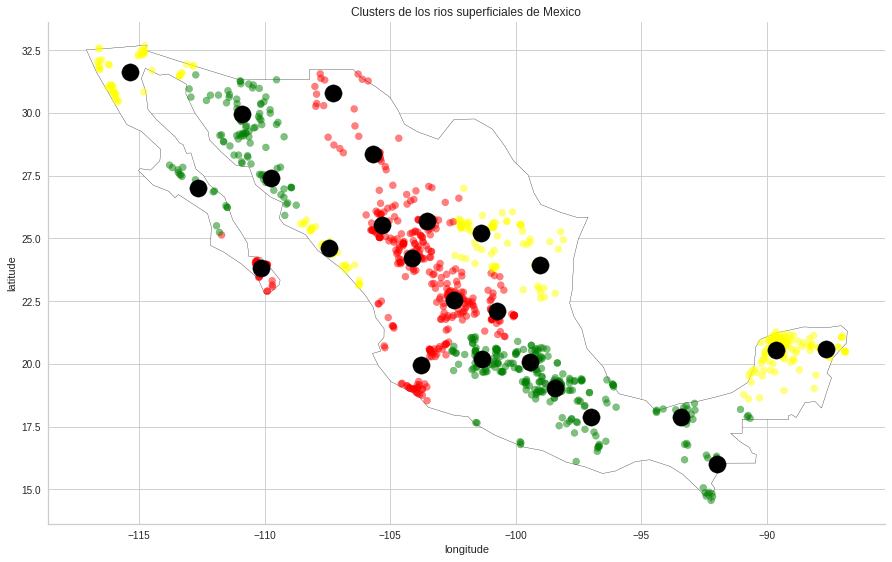

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))

colores = []

color_asig = []

for color in modas_PorCluster:
  if color == 0:
    colores.append('yellow')
  if color == 1:
    colores.append('red')
  if color == 2:
    colores.append('green')

for row in labels:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Subterraneas.plot(ax=gax, color=color_asig, alpha = 0.5)
gdf_C_subterraneas.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de los rios superficiales de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


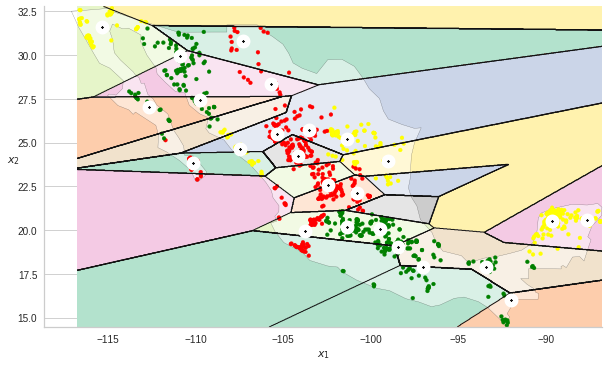

In [ ]:
def plot_data(X, moda, label):
    colores = []

    color_asig = []

    for color in moda:
      if color == 0:
        colores.append('yellow')
      if color == 1:
        colores.append('red')
      if color == 2:
        colores.append('green')

    for row in label:
       color_asig.append(colores[row])

    X["Coordinates"] = list(zip(X.LONGITUD, X.LATITUD))
    X["Coordinates"] = X["Coordinates"].apply(Point)
    gdf = gpd.GeoDataFrame(X, geometry="Coordinates")
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white',alpha=0.5)

    gdf.plot(ax=gax, color=color_asig, alpha = 1, markersize = 15)
    #gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)
    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=1)
    plt.scatter(centroids[:, 1], centroids[:, 0],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, modas, label, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z
    

    plt.contourf(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                cmap="Pastel2")
    plot_data(X, modas, label)
    plt.contour(Z, extent=(mins[1], maxs[1], mins[0], maxs[0]),
                linewidths=1, colors='k')
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


fig, gax = plt.subplots(figsize=(10,10))
plot_decision_boundaries(kmeans, X_Subterranea, modas = modas_PorCluster, label = labels)
plt.show()

En esta especial grafica de los datos subterraneos, podemos notar une tendencia cnetral de que las aguas con mas contaminacion de Mexico se encuentran en la parte central del mismo pais, interesante resultado y viendo por ejemplo una comparacion con una investigacion del Conacyt vemos una tendencia parecida a los resultados obtenidos por explotacion de mantos aquiferos.

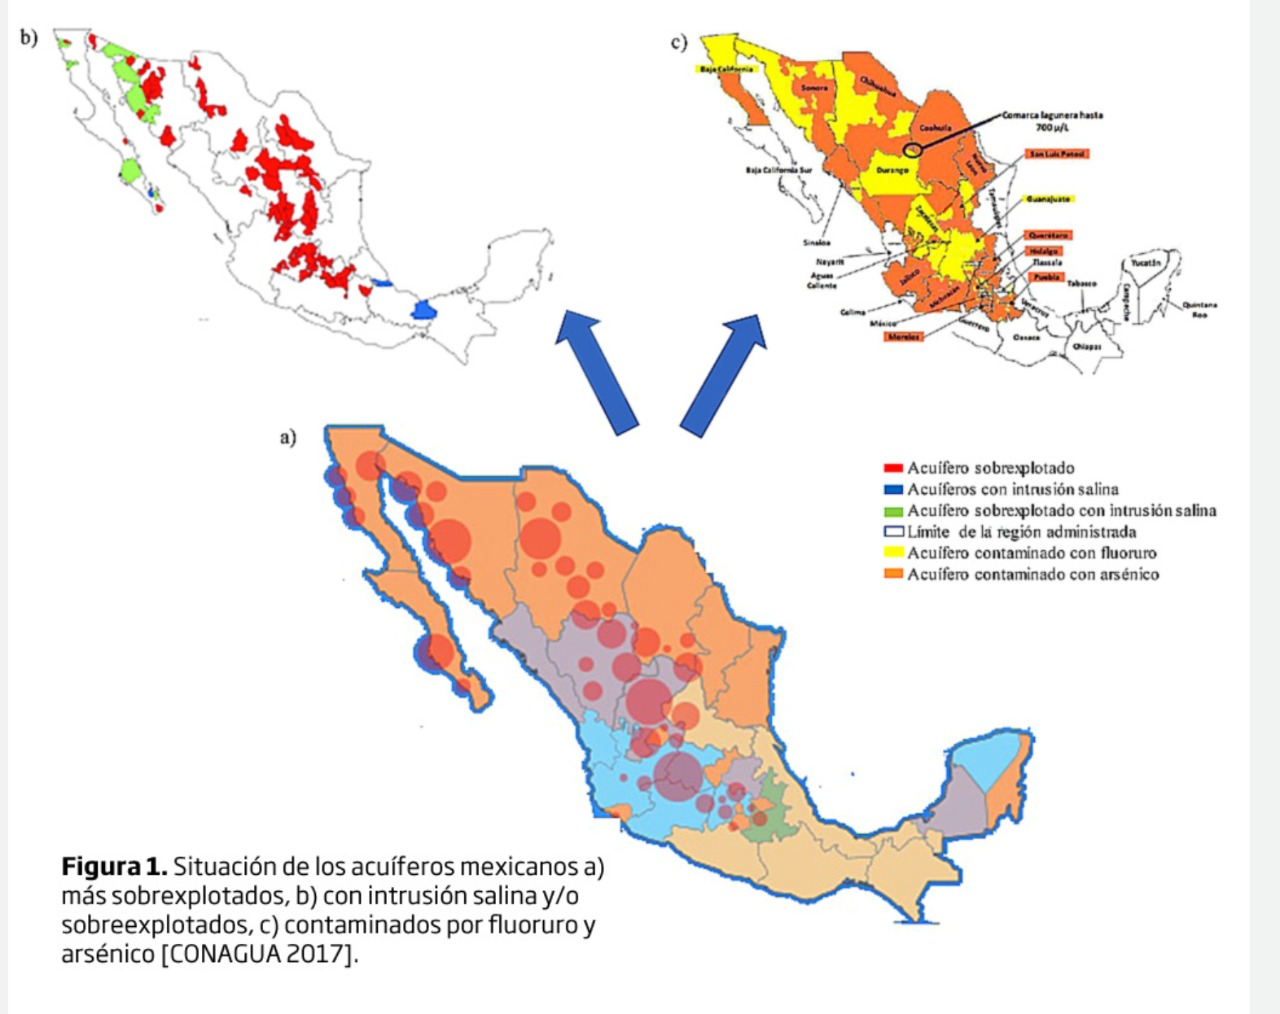

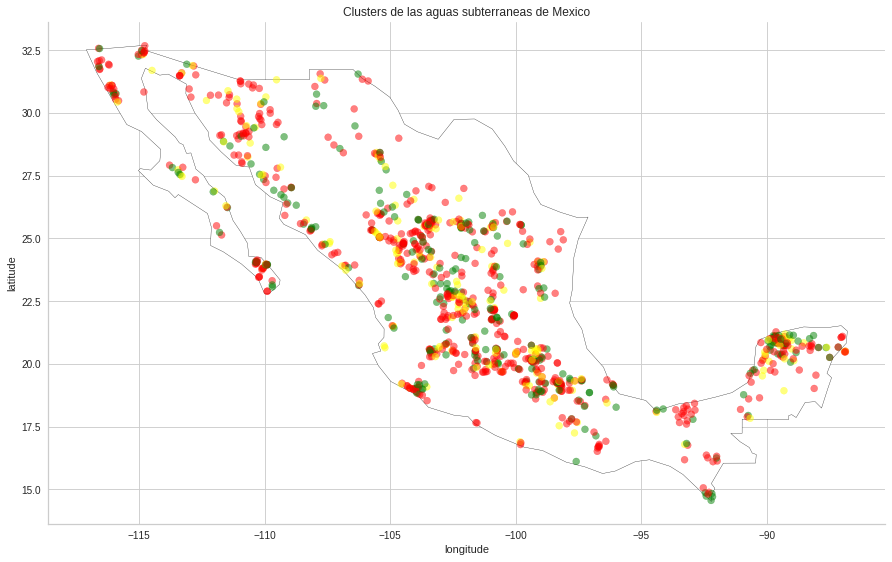

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(X_cluster2, y_cluster2)
centroids = kmeans3.cluster_centers_
labels3 = kmeans3.predict(X_cluster2)
# Getting the cluster centers
C = kmeans3.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C_subterraneas3 = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C_subterraneas3


fig, gax = plt.subplots(figsize=(15,10))

colores = ['red','green','yellow']

color_asig = []

for row in labels3:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf_Subterraneas.plot(ax=gax, color=color_asig, alpha = 0.5,)
#gdf_C_superficiales3.plot(ax=gax, color='black', alpha = 1, markersize = 300, label = "Centroid")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters de las aguas subterraneas de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

*Conclusión

Este ejercicio nos permitió trabajar con datos reales, así como visualizar los problemas de captura de información comúnes en este tipo de análisis, ya que esta información es registrada de forma no estandarizada, por diversas fuentes a nivel nacional. Esto complicó la limpieza del dataset, sin embargo, la cantidad de elementos no numéricos en columnas numericas, era minima, y su sustitución no fue tan compleja. Un punto adicional es que toda la columna predictora, estaba completa, lo que ayudó mucho en el analisis.

Teniendo dos caracteriticas de entrada como coordenadas y una de salida o predictora que es el color del semaforo, nos permitio plantear la siguiente solución:

Aplicar kmeans para clusterizar las sifucientes zonas en el mapa, para posteriormente identificar el valor de la moda de cada zona y colorear los puntos de esa zona, deacuerdo al color del semaforo que aplique de acuerdo a la metrica de la moda de cada cluster o region.

Si bien esto no es una exactitud total, si permite diferenciar las regiones por colores, permitiendo a quien analice dicha informaicón, tener un dato ilustrativo o una tendencia mas exacta.

Por otra parte, trabajar con información geoespacial, facilita la labor del analisis de datos, ya que su visualización se simplifica, de la misma forma que lo haria una grafica o un plot de puntos en una regresion lineal, los puntos en un mapa, con sus colores y dispersiones adecuadas, permiten identificar los elelementos.

Finalmente, y con el enfoque del objetivo de los datos se puede notar que la zona centra o bajio de Mexico es donde se ve la mayor contaminacion de los mantos superficiales del agua, asi como zonas urbanizadas o de puertos por altos flujos maritimos del area. Muchas cuestiones pueden concluirse al ver el mapa.

#Referencias

- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
- VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".
- GEOMATAS. (2022). 7 librerías de Python para SIG y cartografía. Obtenido de https://geomatas.com/7-librerias-de-python-para-sig-y-cartografia/
- GeoPy. (2022). Welcome to GeoPy’s documentation! Obtenido de https://geopy.readthedocs.io/en/stable/
- NAIK, K. (2020). P2: sklearn K-Means (Elbow and Silhouette Method). Obtenido de https://www.kaggle.com/code/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method/notebook
- Geeks for Geeks. (2022, 08 22). Elbow Method for optimal value of k in KMeans. Retrieved from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
- Bahl, A. (22 de 11 de 2019). MAPE v/s MAE% v/s RMSE. Obtenido de https://agrimabahl.medium.com/mape-v-s-mae-v-s-rmse-3e358fd58f65
- Gad, A. (27 de 07 de 2018). Beginners Ask “How Many Hidden Layers/Neurons to Use in Artificial Neural Networks?”. Obtenido de https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e
- IBM. (13 de 09 de 2022). Tipos de variables. Obtenido de https://www.ibm.com/docs/es/spss-statistics/saas?topic=charts-variable-types
- Morales, L. E. (2022). Perceptrón Multi Capa (MLP): Interpretación Geométrica (ejemplo). Guadalajara, Mexico: ITESM.
- Morales, L. E. (2022). Redes Neuronales Artificiales: Perceptrón Simple. Guadalajara, Mexico: ITESM.
- Morales, L. E. (2022). Redes Neuronales y Aprendizaje Automático. Guadalajara: ITESM.
- scikit-learn. (29 de 10 de 2022). Varying regularization in Multi-layer Perceptron. Obtenido de https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#:~:text=Alpha%20is%20a%20parameter%20for,that%20appears%20with%20lesser%20curvatures
- Sérgio Moro, P. R. (2015). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. ELSEVIER, 11.
- Shin, T. (26 de 02 de 2022). Understanding Feature Importance and How to Implement it in Python. Obtenido de https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
- Vandeput, N. (05 de 07 de 2019). Forecast KPIs: RMSE, MAE, MAPE & Bias. Obtenido de https://towardsdatascience.com/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d
- Zvornicanin, E. (01 de 10 de 2022). What is Feature Importance in Machine Learning? Obtenido de https://www.baeldung.com/cs/ml-feature-importance#:~:text=3.-,3.,a%20current%20model%20and%20prediction.
-Khan, M. (2017, 08 01). KMeans Clustering for Classification. Retrieved from https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
- Nithum Thain, A. P. (2022, 03). Are Model Predictions Probabilities? Retrieved from https://pair.withgoogle.com/explorables/uncertainty-calibration/


